<a href="https://colab.research.google.com/github/SeruiosBoss/AI3_1/blob/main/12/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_12_%D0%98%D0%BB%D1%8C%D0%BD%D1%83%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 12. Логические методы классификации

ФИО: **Мухамеджанов Ильнур Тимурович**

Группа: **ПИН-б-о-22-1**

## Задание, Вариант 16

1. Выполните построение модели классификации на основе `дерева
классификации`. В ходе решения задачи необходимо решить следующие подзадачи:
2. Построение `логического классификатора` с заданием `max_depth`
(максимальной глубины) и ``max_features` (максимального количества признаков)
пользователем (установить любые); `визуализация дерева` решений для выбранных
исследователем параметров (в формате .png)
3. Вычисление оценки `cross validation (MSE)` для различнх значений
max_depth (построить график зависимости);
4. Вычисление оценки `cross validation (MSE)` для различнх значений
max_features (построить график зависимости);
5. Вычислите оптимальные значения `max_depth` и `max_features`. Обоснуйте
свой выбор. Продемонстрируйте использование полученного классификатора.
6. Выведите `дерево` в формате `.png`;
7. Выведите `решающие границы` полученной модели.

## Обозначение функций, Построение модели классификации на основе `дерева классификации`, `логического классификатора`, оценок `max_depth, max_features`, вывод дерева в формате `.png`, вывод `решающих границ` полученной модели

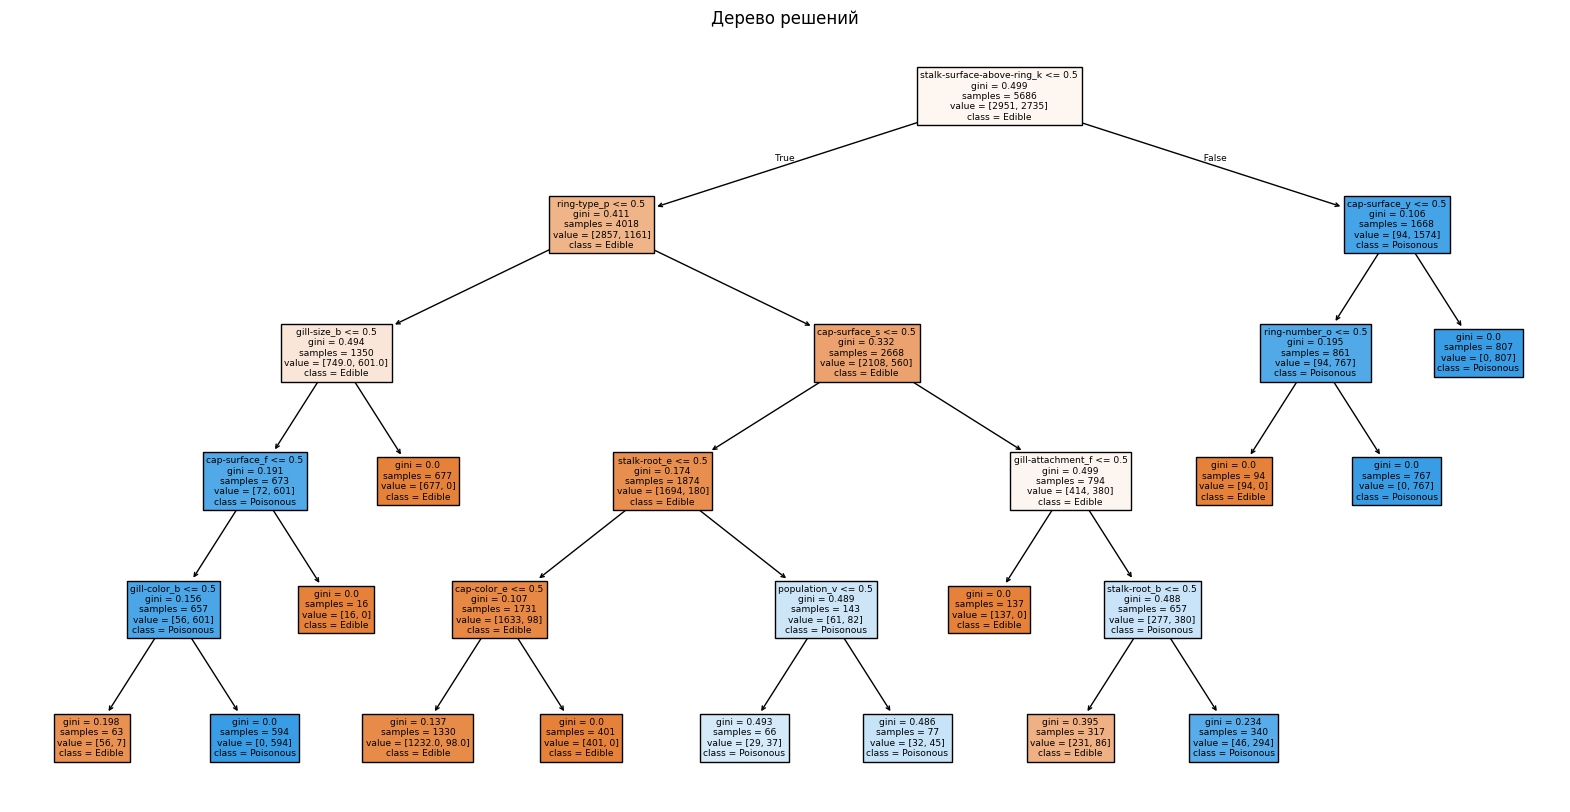

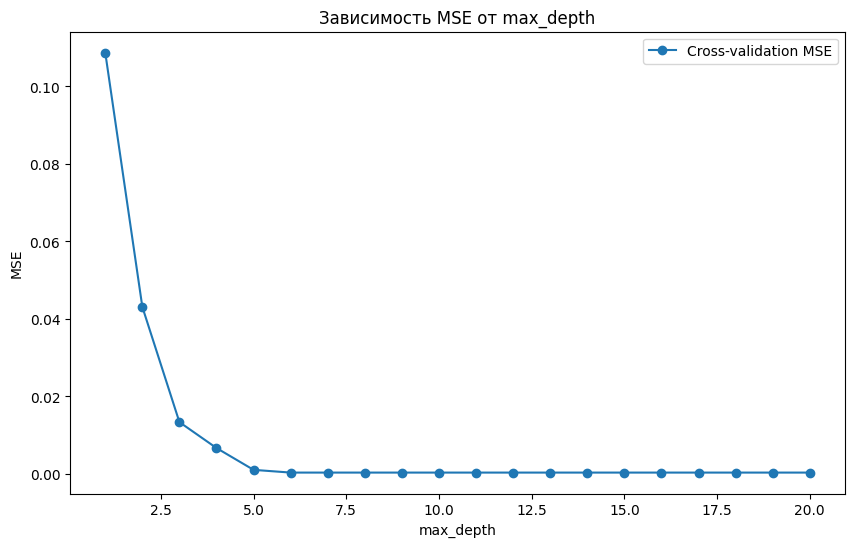

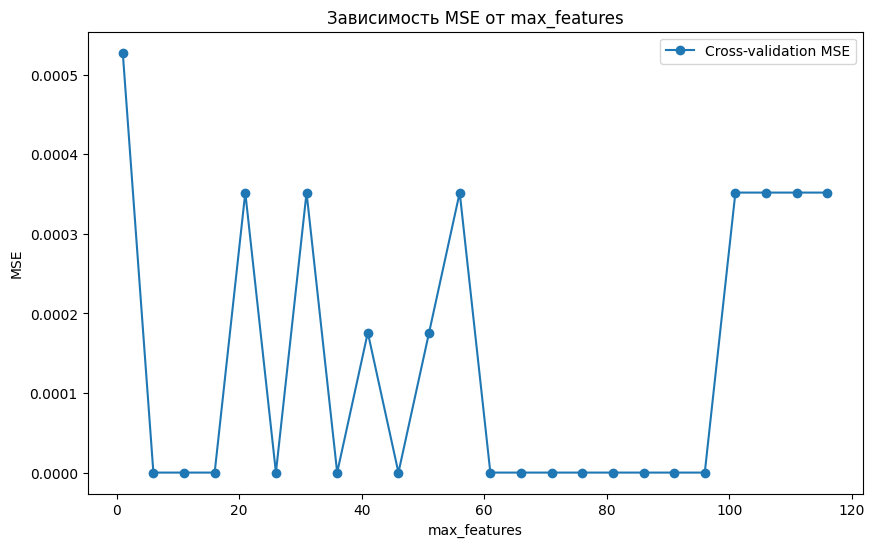

Оптимальное значение max_depth: 6
Оптимальное значение max_features: 6
MSE финального классификатора: 0.07


<Figure size 1000x600 with 0 Axes>

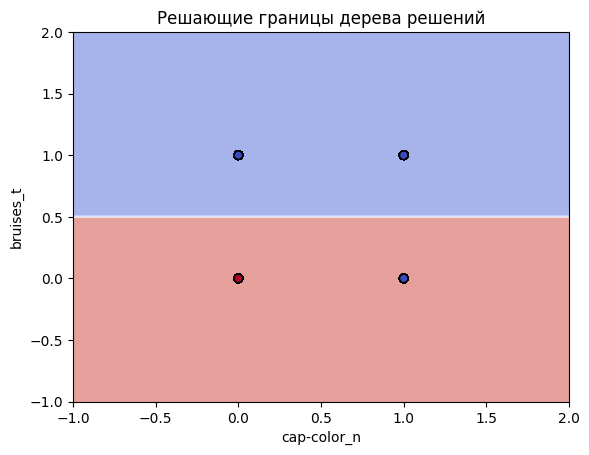

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import DecisionBoundaryDisplay

# Загрузка данных
attributes = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment",
    "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root",
    "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type",
    "spore-print-color", "population", "habitat"
]

data = pd.read_csv("agaricus-lepiota.data", header=None, names=attributes)

# Преобразование данных
# Преобразуем категориальные данные в числовые с помощью one-hot encoding
data_encoded = pd.get_dummies(data.drop('class', axis=1))
labels = data['class'].map({'e': 0, 'p': 1})  # Съедобные = 0, Ядовитые = 1

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data_encoded, labels, test_size=0.3, random_state=42
)

# 1. Построение классификатора
max_depth_values = range(1, 21)
max_features_values = range(1, len(data_encoded.columns) + 1, 5)

# Построение и визуализация дерева решений
chosen_max_depth = 5
chosen_max_features = 10

dt_classifier = DecisionTreeClassifier(max_depth=chosen_max_depth, max_features=chosen_max_features, random_state=42)
dt_classifier.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=data_encoded.columns, class_names=['Edible', 'Poisonous'], filled=True)
plt.title("Дерево решений")
plt.savefig("decision_tree.png")
plt.show()

# 2. Cross-validation для max_depth
cv_mse_depth = []
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    mse = -cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    cv_mse_depth.append(mse)

# График зависимости MSE от max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, cv_mse_depth, marker='o', label='Cross-validation MSE')
plt.title('Зависимость MSE от max_depth')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 3. Cross-validation для max_features
cv_mse_features = []
for features in max_features_values:
    dt = DecisionTreeClassifier(max_features=features, random_state=42)
    mse = -cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    cv_mse_features.append(mse)

# График зависимости MSE от max_features
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, cv_mse_features, marker='o', label='Cross-validation MSE')
plt.title('Зависимость MSE от max_features')
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 4. Оптимальные значения max_depth и max_features
optimal_max_depth = max_depth_values[np.argmin(cv_mse_depth)]
optimal_max_features = max_features_values[np.argmin(cv_mse_features)]

print(f"Оптимальное значение max_depth: {optimal_max_depth}")
print(f"Оптимальное значение max_features: {optimal_max_features}")

# 5. Использование оптимального классификатора
final_dt_classifier = DecisionTreeClassifier(max_depth=optimal_max_depth, max_features=optimal_max_features, random_state=42)
final_dt_classifier.fit(X_train, y_train)
y_pred = final_dt_classifier.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)

print(f"MSE финального классификатора: {final_mse:.2f}")

# 6. Визуализация решающих границ (только для двух признаков)
# Выбор двух признаков для визуализации
selected_features = ['cap-color_n', 'bruises_t']  # Пример двух признаков для анализа
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Обучение классификатора на выбранных признаках
final_dt_classifier = DecisionTreeClassifier(max_depth=optimal_max_depth, max_features=len(selected_features), random_state=42)
final_dt_classifier.fit(X_train_selected, y_train)

# Визуализация решающих границ
plt.figure(figsize=(10, 6))
display = DecisionBoundaryDisplay.from_estimator(
    final_dt_classifier, X_test_selected, response_method="predict", alpha=0.5, cmap="coolwarm"
)
plt.scatter(X_test_selected.iloc[:, 0], X_test_selected.iloc[:, 1], c=y_test, edgecolor="k", cmap="coolwarm")
plt.title("Решающие границы дерева решений")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.savefig("decision_boundaries.png")
plt.show()


В данной работе были использованы библиотеки `numpy, matplotlib, pandas, sklearn` и модули `pyplot, DecisionTreeClassifier, plot_tree, cross_val_score, train_test_split, mean_squared_error, DecisionBoundaryDisplay` для построения классификации на основе `дерева классификации`, `логического классификатора`, оценок `max_depth, max_features`, вывод дерева в формате `.png`, вывод `решающих границ` полученной модели

### 1. **Поясните принцип построения дерева решений.**  
- **Суть метода:**  
  Дерево решений — это алгоритм, который рекурсивно делит пространство признаков на подмножества, стремясь максимизировать "чистоту" (или однородность) данных в каждом подмножестве.  

- **Этапы построения:**  
  1. **Выбор признака для разбиения:**  
     - Используются критерии информативности, такие как энтропия, прирост информации или критерий Джини.  
  2. **Разделение данных:**  
     - На каждой вершине (узле) данные делятся на подгруппы на основе выбранного признака и порога.  
  3. **Рекурсивное построение:**  
     - Процесс повторяется для каждой подгруппы до достижения критерия остановки (например, минимального размера узла).  
  4. **Присвоение метки класса:**  
     - В листьях (конечных узлах) определяется класс на основе большинства объектов.  

---

### 2. **Укажите статистическое определение информативности.**  
- **Информативность признака** — это мера уменьшения неопределенности (энтропии) или улучшения предсказательной способности при использовании признака для разделения данных.  

- **Формула прироста информации:**  
\[
IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)
\]  
где \(H(S)\) — энтропия исходного набора, \(H(S_v)\) — энтропия подмножества, \(A\) — признак, \(S_v\) — подмножество, полученное разбиением по \(A\).  

---

### 3. **Поясните энтропийное определение информативности.**  
- **Энтропия:**  
  Это мера неопределенности или хаотичности данных:  
  \[
  H(S) = - \sum_{i=1}^C p_i \log_2 p_i
  \]  
  где \(p_i\) — вероятность класса \(i\), \(C\) — количество классов.  

- **Прирост информации (Information Gain):**  
  Это уменьшение энтропии при разбиении данных по признаку:  
  \[
  IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)
  \]  

- **Информативность признака:**  
  Чем больше прирост информации, тем более информативным является признак для разделения данных.  

---

### 4. **Что такое многоклассовая информативность? Для чего она применяется?**  
- **Многоклассовая информативность** — это мера информативности признака в задачах классификации с несколькими классами.  

- **Применение:**  
  Используется для оценки полезности признаков в задачах, где целевая переменная имеет более двух категорий.  

- **Пример:**  
  Для многоклассовых данных прирост информации или критерий Джини учитывают вероятность принадлежности объекта ко всем классам, а не только к двум.  

---

### 5. **Поясните назначение и алгоритм бинаризации количественных признаков.**  
- **Назначение:**  
  Бинаризация количественных признаков превращает их в бинарные значения, что облегчает использование методов, требующих категориальных данных, таких как некоторые варианты деревьев решений или логистической регрессии.  

- **Алгоритм:**  
  1. **Выбор порога (threshold):**  
     - Порог можно выбрать на основе медианы, среднего значения или анализа распределения данных.  
  2. **Создание бинарного признака:**  
     - Признак принимает значение 1, если его значение больше или равно порогу, и 0 — иначе.  

- **Пример:**  
  Исходный признак: [3.5, 7.2, 2.1, 5.8], порог = 5.  
  После бинаризации: [0, 1, 0, 1].  

---

### 6. **Поясните порядок поиска закономерностей в форме конъюнкций.**  
- **Закономерности в форме конъюнкций:**  
  Это правила вида:  
  \[
  \text{Если (условие 1 И условие 2 И ... И условие n), то класс = X.}
  \]  

- **Порядок поиска:**  
  1. **Генерация кандидатов:**  
     - Формируются комбинации условий на основе признаков данных.  
  2. **Оценка качества:**  
     - Проверяется точность каждого правила на обучающей выборке.  
     - Используются метрики, такие как поддержка (support) и достоверность (confidence).  
  3. **Фильтрация:**  
     - Убираются конъюнкции с низкой поддержкой или достоверностью.  
  4. **Оптимизация:**  
     - Убираются избыточные условия, не влияющие на результат.  

- **Пример:**  
  Для данных с признаками "Возраст" и "Доход" возможная закономерность:  
  \[
  \text{Если (Возраст > 30 И Доход > 50000), то класс = "Покупатель".}
  \]